In [ ]:
# Instalação dos pacotes necessários
!pip install google-cloud-bigquery
!pip install pandas-gbq

In [ ]:
import pandas_gbq
from google.cloud import bigquery
import pandas as pd
import seaborn as sns

In [ ]:
# Leitura dos DataFrames

# Query com informações sobre atletas
query1 = """
        select
          ab.name as athlete_name, ab.sex,ab.birth_year, ab.height, ab.weight,ab.country,
           aer.edition, aer.sport, aer.event, aer.medal, aer.is_team_sport
        from basedosdados.world_olympedia_olympics.athlete_bio as ab
        left join basedosdados.world_olympedia_olympics.athlete_event_result as aer
        on ab.athlete_id = aer.athlete_id;
"""
# Query com informações sobre os jogos
query2 = """
        select
          g.year, g.edition, g.city, g.country_flag_url, g.is_held,
          gm.country, gm.gold, gm.silver, gm.bronze, gm.total as total_medals
        from basedosdados.world_olympedia_olympics.game as g
        left join basedosdados.world_olympedia_olympics.game_medal_tally as gm
        on g.edition_id = gm.edition_id;
"""

# Leitura dos dados do BigQuery
df_atletas= pandas_gbq.read_gbq(query1, project_id='analise-jogos-olimpicos')
df_jogos = pandas_gbq.read_gbq(query2, project_id='analise-jogos-olimpicos')

Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [ ]:
# Entendo os Dados de df_atletas_pd
print('Info atletas')
df_atletas.info()
print('\nDescribe atletas\n', df_atletas.describe(include='all'))
print('\nIsnull atletas\n', df_atletas.isnull().sum())

# Entendo os Dados de df_jogos_pd
print('\nInfo jogos')
df_jogos.info()
print('\nDescribe jogos\n', df_jogos.describe(include='all'))
print('\nIsnull jogos\n', df_jogos.isnull().sum())

Info atletas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316827 entries, 0 to 316826
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_name   316827 non-null  object 
 1   sex            316827 non-null  object 
 2   birth_year     310919 non-null  Int64  
 3   height         229443 non-null  float64
 4   weight         226884 non-null  float64
 5   country        316827 non-null  object 
 6   edition        316827 non-null  object 
 7   sport          316827 non-null  object 
 8   event          316827 non-null  object 
 9   medal          44686 non-null   object 
 10  is_team_sport  316827 non-null  boolean
dtypes: Int64(1), boolean(1), float64(2), object(7)
memory usage: 25.1+ MB

Describe atletas
          athlete_name     sex   birth_year         height         weight  \
count          316827  316827     310919.0  229443.000000  226884.000000   
unique         152747       2         <NA>   

In [ ]:
# filtro tipo: durante a analise exploratoria foi identicado que a base de dados contem tipo de jogos diferentes de olimpiadas de inverno e verão, as quais são o alvo desse analise
df_atletas['tipo_edicao'] = df_atletas['edition'].str.extract(r'\d{4} (.+)')
print('Atletas:',df_atletas.head().to_string())

df_atletas = df_atletas[df_atletas['tipo_edicao'].isin(['Summer Olympics', 'Winter Olympics'])]

df_jogos['tipo_edicao'] = df_jogos['edition'].str.extract(r'\d{4} (.+)')
print('Jogos: ', df_jogos.head().to_string())

df_jogos = df_jogos[df_jogos['tipo_edicao'].isin(['Summer Olympics', 'Winter Olympics'])]

Atletas:       athlete_name   sex  birth_year  height  weight country               edition             sport                  event medal  is_team_sport      tipo_edicao
0      A. Sansores  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing       Sabre, Team, Men  None           True  Summer Olympics
1     Álvaro Ledón  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing  Foil, Individual, Men  None          False  Summer Olympics
2     Álvaro Ledón  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing        Foil, Team, Men  None           True  Summer Olympics
3  Abelardo Cuevas  Male        <NA>     NaN     NaN    Cuba  1932 Summer Olympics  Art Competitions            Music, Open  None          False  Summer Olympics
4     V. Fernández  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing       Sabre, Team, Men  None           True  Summer Olympics
Jogos:     year    

In [ ]:
#verifica duplicadas
print('df_atletas duplicadas: ', df_atletas.duplicated().sum())
print('df_jogos duplicadas: ', df_jogos.duplicated().sum())


df_atletas duplicadas:  2269
df_jogos duplicadas:  0


In [ ]:
# entendendo duplicadas por amostragem
df_atletas[df_atletas.duplicated()]


,athlete_name,sex,birth_year,height,weight,country,edition,sport,event,medal,is_team_sport,tipo_edicao
243,Temba Sherpa,Male,<NA>,NaN,NaN,India,1924 Winter Olympics,Alpinism,"Alpinism, Open",Gold,True,Winter Olympics
244,Temba Sherpa,Male,<NA>,NaN,NaN,India,1924 Winter Olympics,Alpinism,"Alpinism, Open",Gold,True,Winter Olympics
245,Temba Sherpa,Male,<NA>,NaN,NaN,India,1924 Winter Olympics,Alpinism,"Alpinism, Open",Gold,True,Winter Olympics
253,Antarge Sherpa,Male,<NA>,NaN,NaN,India,1924 Winter Olympics,Alpinism,"Alpinism, Open",Gold,True,Winter Olympics
254,Antarge Sherpa,Male,<NA>,NaN,NaN,India,1924 Winter Olympics,Alpinism,"Alpinism, Open",Gold,True,Winter Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...
123381,Cecilia Rosado,Female,1952,NaN,NaN,Mexico,1968 Summer Olympics,Tennis,"Doubles, Women",None,True,Summer Olympics
124329,Joke van Beusekom,Female,1952,NaN,NaN,Netherlands,1972 Summer Olympics,Badminton,"Doubles, Mixed",None,True,Summer Olympics
172191,Fernando Elortondo,Male,1966,NaN,NaN,Argentina,1992 Summer Olympics,Basque pelota,"Paleta Cuero, Doubles, Men",None,True,Summer Olympics
232625,Stefano Carozzo,Male,1979,193.0,82.0,Italy,2008 Summer Olympics,Fencing,"Épée, Team, Men",Bronze,True,Summer Olympics


In [ ]:
# confirmando duplicadas por amostragem
dup1 = df_atletas[df_atletas['athlete_name'] == 'Michael Phelps']


dup2 = df_atletas[(df_atletas['athlete_name'] == 'Michael Phelps') & (df_atletas['edition'] == '2008 Summer Olympics')]

print('Filtro 1\n', dup1.head().to_string())
print('\nFiltro 2\n', dup2.to_string())


Filtro 1
           athlete_name   sex  birth_year  height  weight         country               edition     sport                              event medal  is_team_sport      tipo_edicao
263573  Michael Phelps  Male        1985   193.0    91.0   United States  2000 Summer Olympics  Swimming          200 metres Butterfly, Men  None          False  Summer Olympics
263574  Michael Phelps  Male        1985   193.0    91.0   United States  2012 Summer Olympics  Swimming  400 metres Individual Medley, Men  None          False  Summer Olympics
263575  Michael Phelps  Male        1985   193.0    91.0   United States  2004 Summer Olympics  Swimming          100 metres Butterfly, Men  Gold          False  Summer Olympics
263576  Michael Phelps  Male        1985   193.0    91.0   United States  2004 Summer Olympics  Swimming          200 metres Butterfly, Men  Gold          False  Summer Olympics
263577  Michael Phelps  Male        1985   193.0    91.0   United States  2004 Summer Olympics  Swim

A duplicidade dos nomes dos atletas se deu  dá pela necessidade de sperar as informações por tipo de evento, e vinculocas medadalhas ganhas. Optou-se então por mander duas bases de dados, um limpa (para calculo de metricas, medias e afins) e outra completa para calculo de medalhas

In [ ]:
# Remover duplicatas
df_atletas_limpo = df_atletas.drop_duplicates()

#verifica duplicadas apos remoção
print('df_atletas duplicadas: ', df_atletas_limpo.duplicated().sum())

df_atletas duplicadas:  0


In [ ]:
#criação da coluna ano
df_atletas_limpo['ano'] = df_atletas_limpo['edition'].str.extract(r'(\d{4})').astype(int)

#criação da coluna idade
df_atletas_limpo['idade'] = df_atletas_limpo['ano'] - df_atletas_limpo['birth_year']

#conferi daframe

print(df_atletas_limpo.head().to_string())

      athlete_name   sex  birth_year  height  weight country               edition             sport                  event medal  is_team_sport      tipo_edicao   ano  idade
0      A. Sansores  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing       Sabre, Team, Men  None           True  Summer Olympics  1924   <NA>
1     Álvaro Ledón  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing  Foil, Individual, Men  None          False  Summer Olympics  1924   <NA>
2     Álvaro Ledón  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing        Foil, Team, Men  None           True  Summer Olympics  1924   <NA>
3  Abelardo Cuevas  Male        <NA>     NaN     NaN    Cuba  1932 Summer Olympics  Art Competitions            Music, Open  None          False  Summer Olympics  1932   <NA>
4     V. Fernández  Male        <NA>     NaN     NaN    Cuba  1924 Summer Olympics           Fencing       Sabre, Team, Men  

<ipython-input-16-54a9f0277f19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atletas_limpo['ano'] = df_atletas_limpo['edition'].str.extract(r'(\d{4})').astype(int)
<ipython-input-16-54a9f0277f19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atletas_limpo['idade'] = df_atletas_limpo['ano'] - df_atletas_limpo['birth_year']


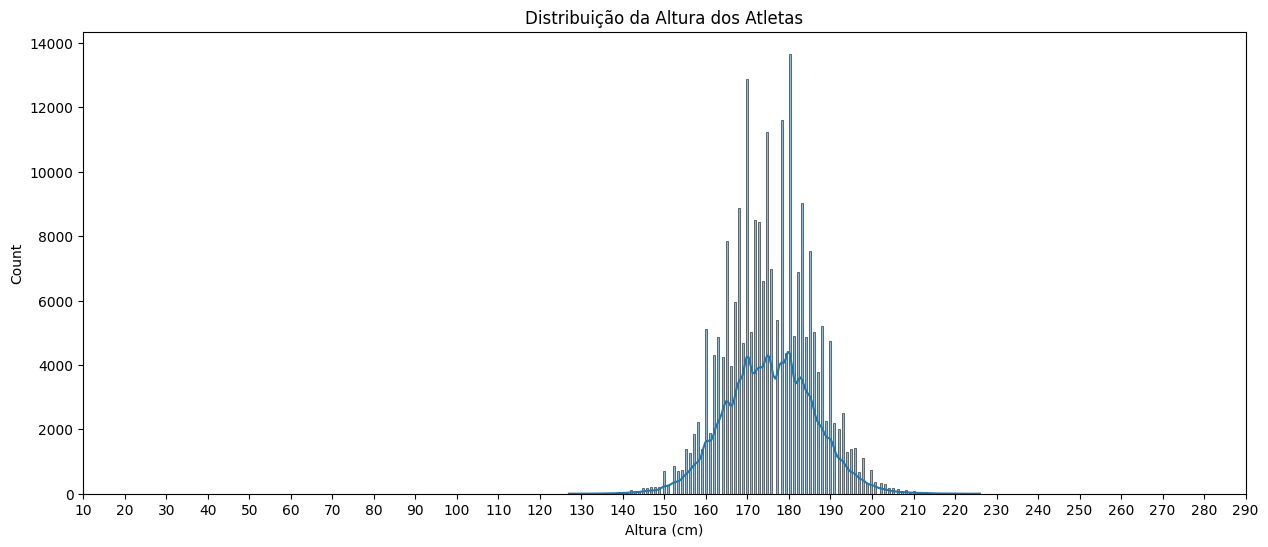

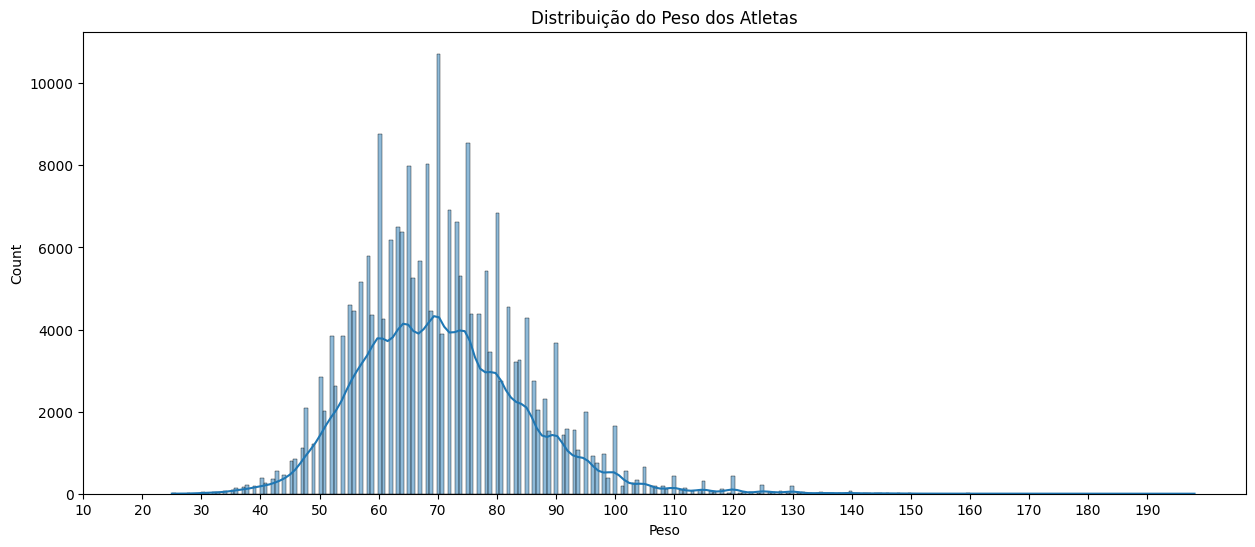

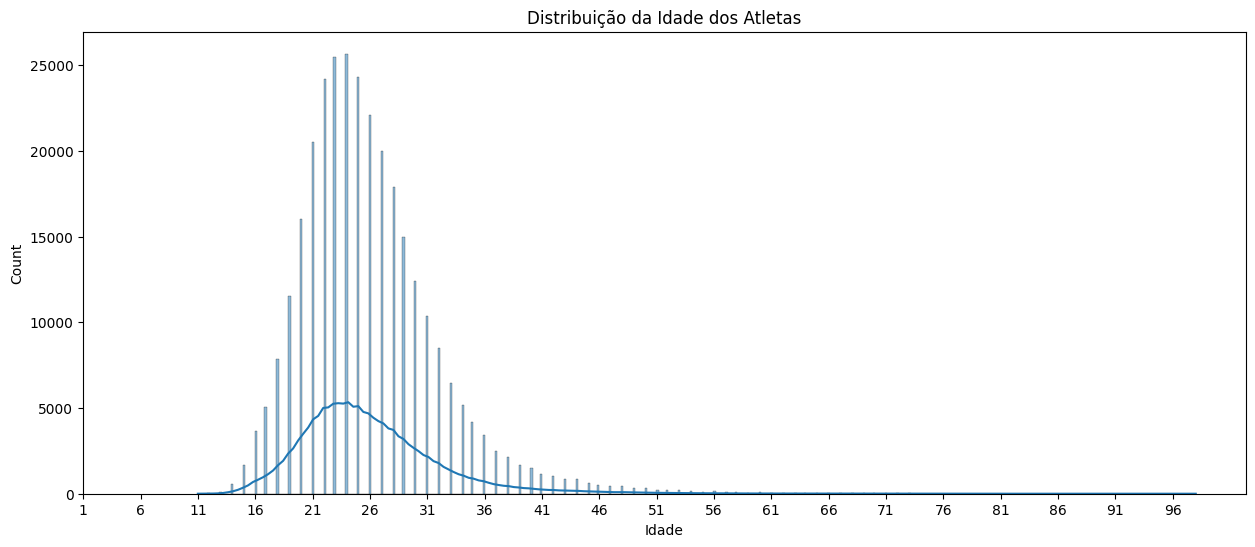

In [ ]:
# Análise exploratória df_atletas

import matplotlib.pyplot as plt

# distribuição de altura dos atletas
plt.figure(figsize=(15, 6))
sns.histplot(df_atletas_limpo['height'], kde=True)
plt.title('Distribuição da Altura dos Atletas')
plt.xlabel('Altura (cm)')
plt.xticks(range(10, 300, 10))
plt.show()

# distribuição de peso dos atletas
plt.figure(figsize=(15, 6))
sns.histplot(df_atletas_limpo['weight'], kde=True)
plt.title('Distribuição do Peso dos Atletas')
plt.xlabel('Peso')
plt.xticks(range(10, 200, 10))
plt.show()

# distribuição de idade dos atletas
plt.figure(figsize=(15, 6))
sns.histplot(df_atletas_limpo['idade'], kde=True)
plt.title('Distribuição da Idade dos Atletas')
plt.xlabel('Idade')
plt.xticks(range(1, 100, 5))
plt.show()



Pelos gráficos de distribuição verifica-se que a maior concentração de altleta sua altura entre 170 e 180 cm, peso entre 60 e 80 kg e idade entre 22 e 27 anos.

Text(0.5, 1.0, 'Correlação entre Variáveis')

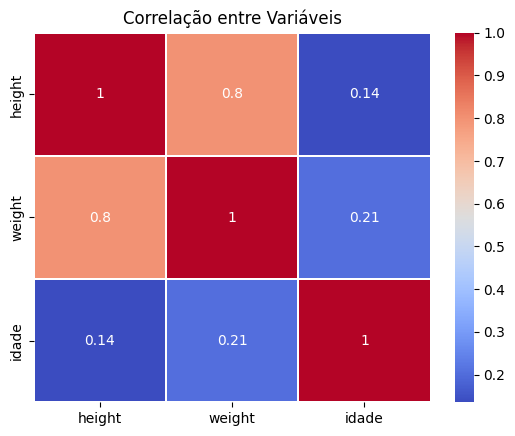

In [ ]:
# correção entre altura, peso e dos atletas
corr = df_atletas_limpo[['height', 'weight', 'idade']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',linewidths=0.1)
plt.title('Correlação entre Variáveis')




Pelo mapa de calor vê-se que existe uma boa correlação entre altura e peso, a idade não influencia tanto

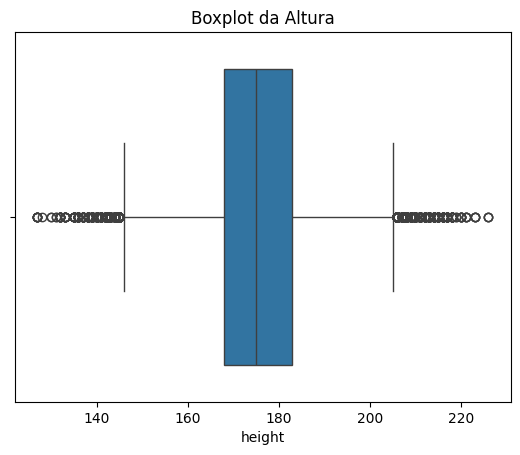

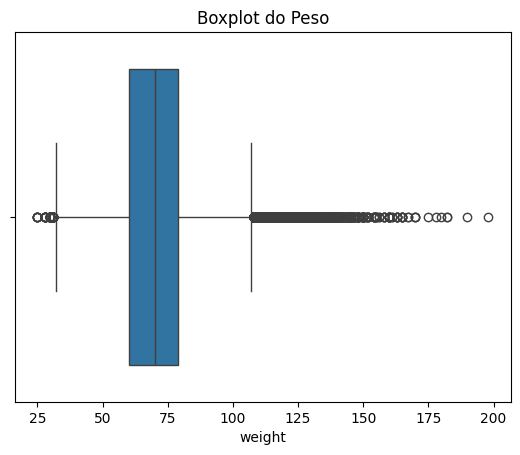

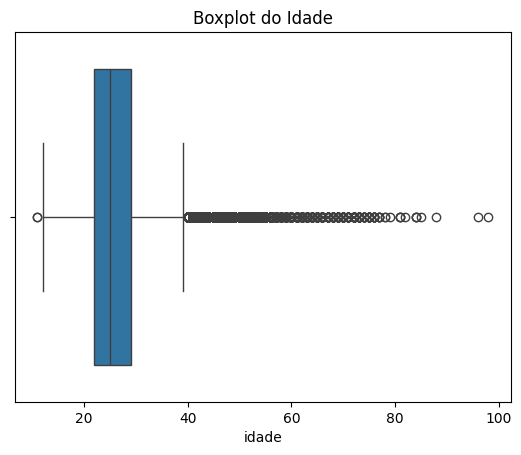

In [ ]:
#vericando se outliers
sns.boxplot(x=df_atletas['height'])
plt.title('Boxplot da Altura')
plt.show()

sns.boxplot(x=df_atletas_limpo['weight'])
plt.title('Boxplot do Peso')
plt.show()

sns.boxplot(x=df_atletas_limpo['idade'])
plt.title('Boxplot do Idade')
plt.show()

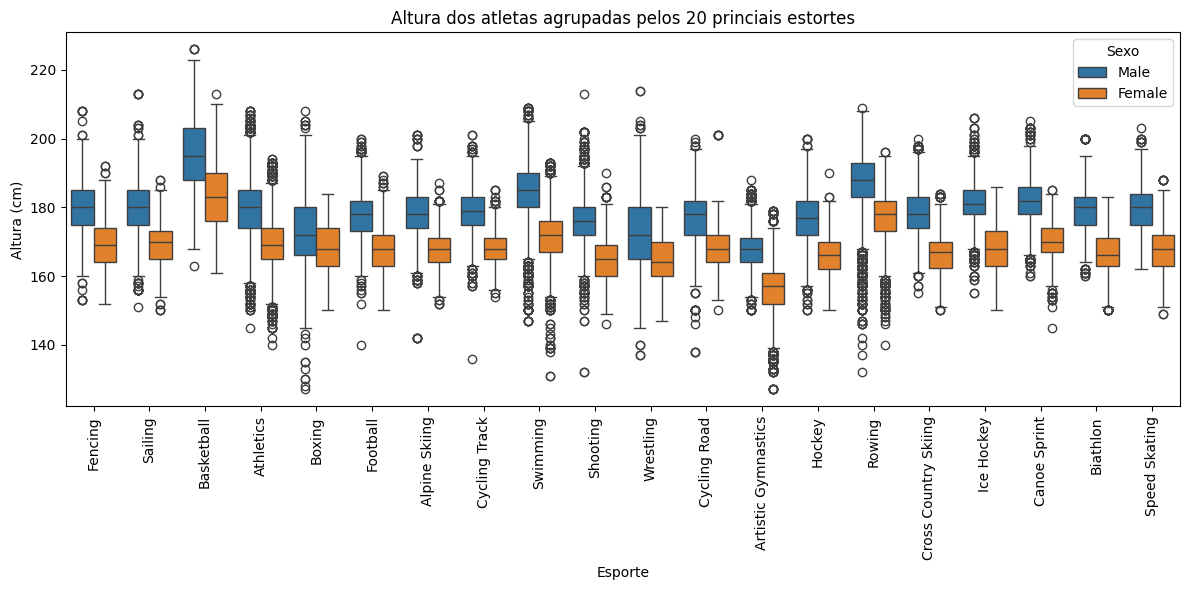

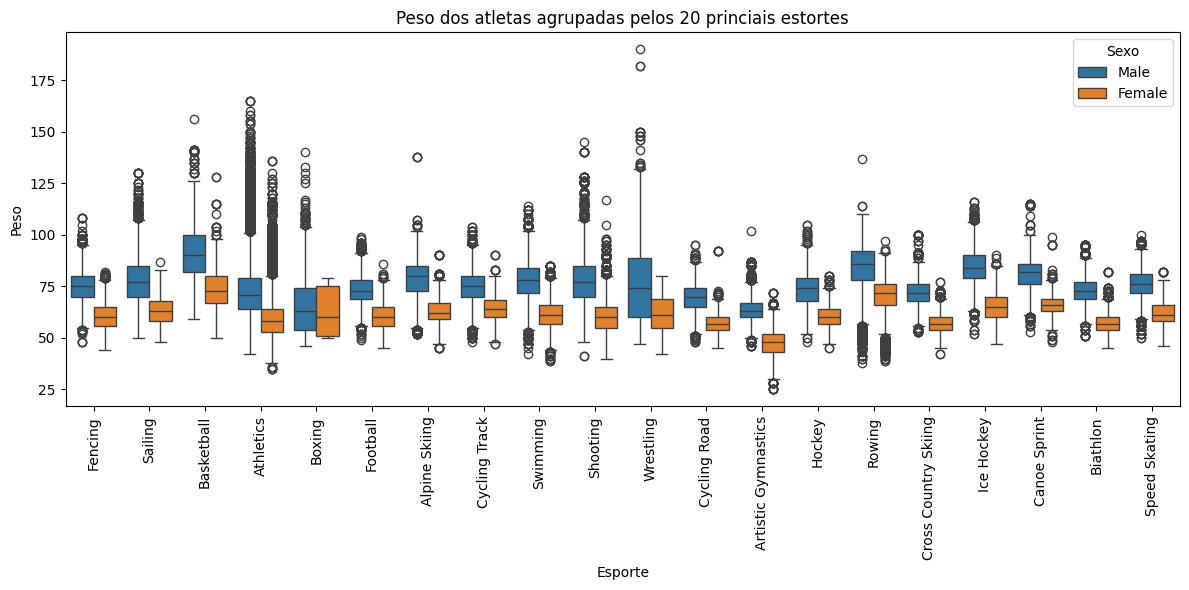

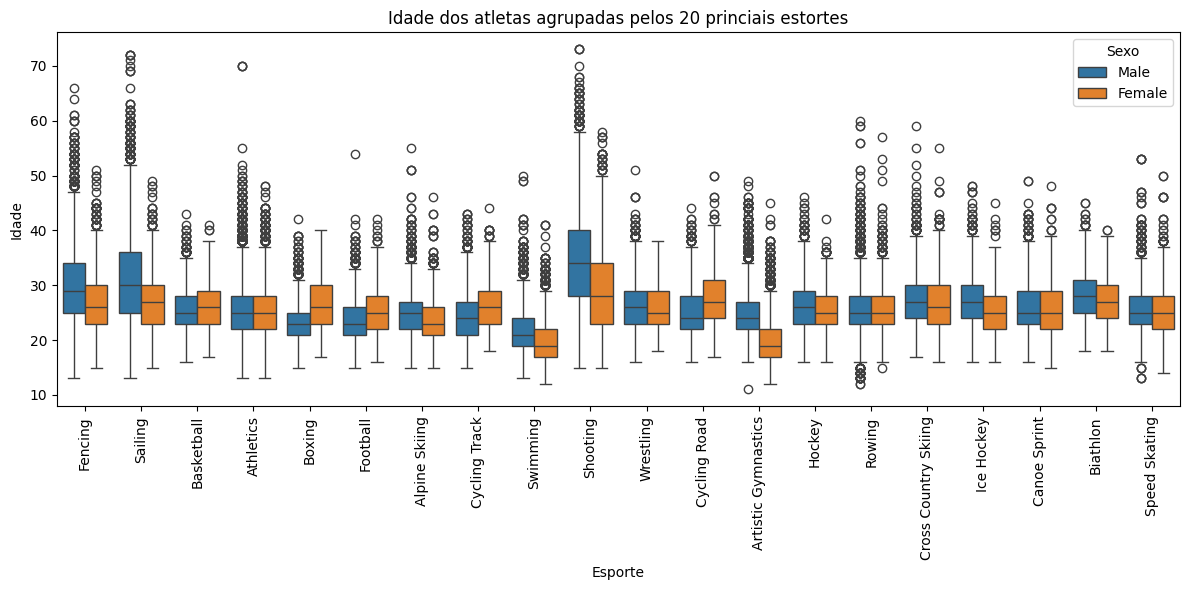

In [ ]:
#vericando se outliers existem por caracterisca especificas exigidas pelo esporte e/ou sexo

top_esportes = df_atletas_limpo['sport'].value_counts().head(20).index # optou-se por selecionar top 20 para facilitar leitura
df_top = df_atletas_limpo[df_atletas_limpo['sport'].isin(top_esportes)]

#altura
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='height', hue='sex', data=df_top)
plt.xticks(rotation=90)  # agora vai dar pra ler melhor
plt.title('Altura dos atletas agrupadas pelos 20 princiais estortes')
plt.xlabel('Esporte')
plt.ylabel('Altura (cm)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

#peso
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='weight', hue='sex', data=df_top)
plt.xticks(rotation=90)  # agora vai dar pra ler melhor
plt.title('Peso dos atletas agrupadas pelos 20 princiais estortes')
plt.xlabel('Esporte')
plt.ylabel('Peso')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

#idade
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='idade', hue='sex', data=df_top)
plt.xticks(rotation=90)  # agora vai dar pra ler melhor
plt.title('Idade dos atletas agrupadas pelos 20 princiais estortes')
plt.xlabel('Esporte')
plt.ylabel('Idade')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

Alguns esporte possuem um média de altura e peso maior, como é o caso do basket. No panorama geral homens tem altura e peso maior que das mulhores, mas quando se fala e idade as média são mais igualitarias e no boxing as mulheres são mais velhas que os homens. o tiro esportivo aceita atletas com mais velhos

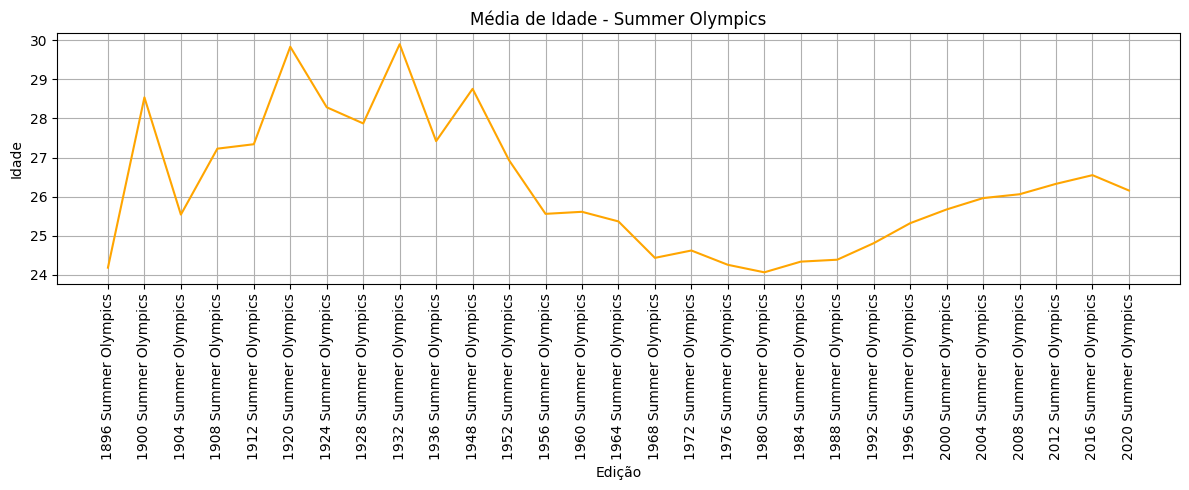

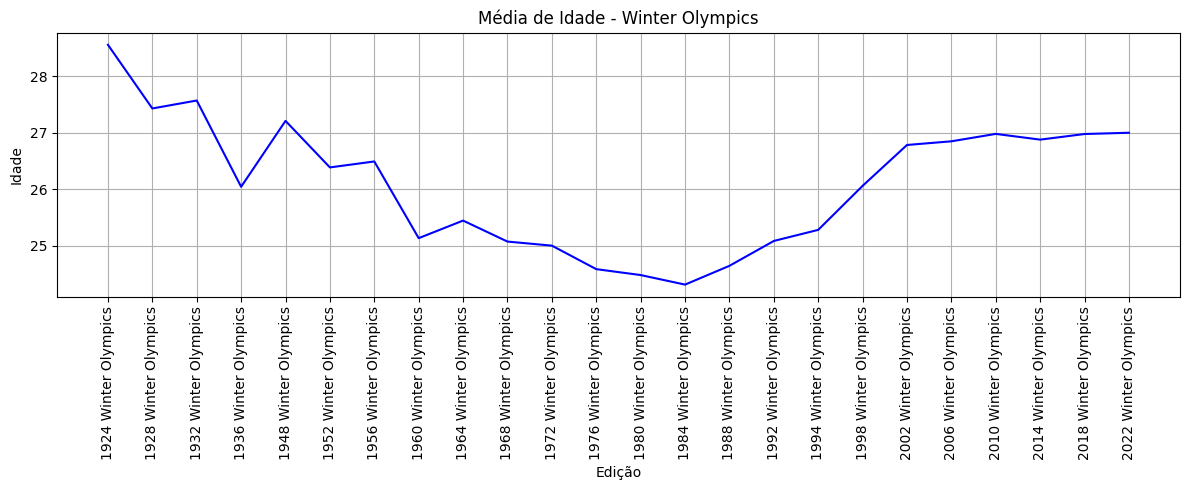

In [ ]:
# Média de idade por edição
idade_grupo = df_atletas_limpo.groupby(['edition', 'tipo_edicao'])['idade'].mean().reset_index()

# Filtrando para cada tipo
idade_summer = idade_grupo[idade_grupo['tipo_edicao'] == 'Summer Olympics']
idade_winter = idade_grupo[idade_grupo['tipo_edicao'] == 'Winter Olympics']

#  Summer Olympics
plt.figure(figsize=(12,5))
plt.plot(idade_summer['edition'], idade_summer['idade'], label='Summer Olympics', color='orange')
plt.xticks(rotation=90)
plt.title('Média de Idade - Summer Olympics')
plt.xlabel('Edição')
plt.ylabel('Idade')
plt.grid(True)
plt.tight_layout()
plt.show()

# Winter Olympics
plt.figure(figsize=(12,5))
plt.plot(idade_winter['edition'], idade_winter['idade'], label='Winter Olympics', color='blue')
plt.xticks(rotation=90)
plt.title('Média de Idade - Winter Olympics')
plt.xlabel('Edição')
plt.ylabel('Idade')
plt.grid(True)
plt.tight_layout()
plt.show()

A  média de idade dos jogos olímpicos de verão teve uma caída significativa a partir da edição de 1948, e começou a subir a partir da ediçao de 1980, mas mesmo assim esta bem abaixo das edições das decadas de 20 e 30.

A  média de idade dos jogos olímpicos de inverno teve uma caída significativa a partir da edição de 1948, e começou a subir a partir da ediçao de 1984, e se aproxime da média de edade das decadas passadas

In [ ]:
# identificando tipos de jogos
tipos_edicoes = df_atletas_limpo['tipo_edicao'].unique()
print('Tipos edicões\n', tipos_edicoes)

qte_edicao = df_atletas_limpo.groupby('tipo_edicao')['tipo_edicao'].count()
print('\nQuantidade de edições\n', qte_edicao)





Tipos edicões
 ['Summer Olympics' 'Winter Olympics']

Quantidade de edições
 tipo_edicao
Summer Olympics    252604
Winter Olympics     61631
Name: tipo_edicao, dtype: int64


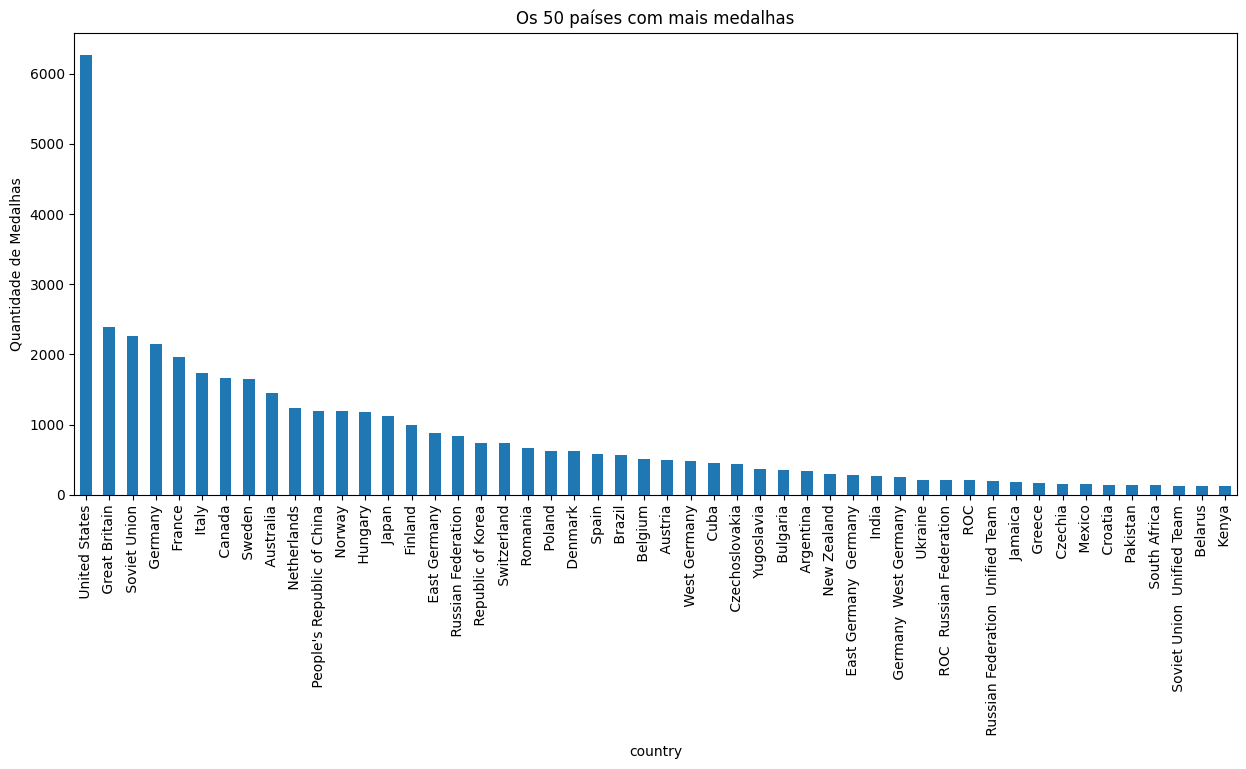

In [ ]:
#conta medalhas
medalhas = df_atletas.dropna(subset=['medal'])
medalhas_por_pais = medalhas.groupby('country')['medal'].count().sort_values(ascending=False).head(50)

#mostrar 50 maiores medalhistas
plt.figure(figsize=(15, 6))
medalhas_por_pais.plot(kind='bar', title='Os 50 países com mais medalhas')
plt.ylabel('Quantidade de Medalhas')
plt.show()



O estados unidos é o maior metalhista de todos os tempos

In [ ]:
# Edições não realizadas
df_jogos[df_jogos['is_held'].notna()][['year', 'edition', 'is_held']]

,year,edition,is_held
1811,1940,1940 Summer Olympics,Not held due to war
1812,1944,1944 Summer Olympics,Not held due to war
1813,1916,1916 Summer Olympics,Not held due to war
1814,1940,1940 Winter Olympics,Not held due to war
1815,1944,1944 Winter Olympics,Not held due to war


Cinco edições não foram realizadas por causa da guerra

In [ ]:
#verificar nulos
# Entendo os Dados de df_atletas_pd
print('Info atletas')
df_atletas_limpo.info()
print('\nIsnull atletas\n', df_atletas_limpo.isnull().sum())

# Entendo os Dados de df_jogos_pd
print('\nInfo jogos')
df_jogos.info()
print('\nIsnull jogos\n', df_jogos.isnull().sum())




Info atletas
<class 'pandas.core.frame.DataFrame'>
Index: 314235 entries, 0 to 316826
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_name   314235 non-null  object 
 1   sex            314235 non-null  object 
 2   birth_year     308574 non-null  Int64  
 3   height         229257 non-null  float64
 4   weight         226698 non-null  float64
 5   country        314235 non-null  object 
 6   edition        314235 non-null  object 
 7   sport          314235 non-null  object 
 8   event          314235 non-null  object 
 9   medal          44550 non-null   object 
 10  is_team_sport  314235 non-null  boolean
 11  tipo_edicao    314235 non-null  object 
 12  ano            314235 non-null  int64  
 13  idade          308574 non-null  Int64  
dtypes: Int64(2), boolean(1), float64(2), int64(1), object(8)
memory usage: 34.8+ MB

Isnull atletas
 athlete_name          0
sex                   0
birth_year 

In [ ]:
# converter tipo de 'idade' para padronizar com height e weight tratar melho valorres com nan
df_atletas_limpo['idade'] = df_atletas_limpo['idade'].astype('float')



print(df_atletas_limpo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 314235 entries, 0 to 316826
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_name   314235 non-null  object 
 1   sex            314235 non-null  object 
 2   birth_year     308574 non-null  Int64  
 3   height         229257 non-null  float64
 4   weight         226698 non-null  float64
 5   country        314235 non-null  object 
 6   edition        314235 non-null  object 
 7   sport          314235 non-null  object 
 8   event          314235 non-null  object 
 9   medal          44550 non-null   object 
 10  is_team_sport  314235 non-null  boolean
 11  tipo_edicao    314235 non-null  object 
 12  ano            314235 non-null  int64  
 13  idade          308574 non-null  float64
dtypes: Int64(1), boolean(1), float64(3), int64(1), object(8)
memory usage: 34.5+ MB
None


<ipython-input-26-bc0e30c937cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atletas_limpo['idade'] = df_atletas_limpo['idade'].astype('float')


In [ ]:
# Tratar nulos
# Ver proporção de nulos
df_atletas_limpo[['height', 'weight', 'idade']].isnull().mean()


,0
height,0.270428
weight,0.278572
idade,0.018015


In [ ]:
# remover registos nulos
df_atletas_limpo = df_atletas_limpo.dropna(subset=['height', 'weight', 'birth_year'], how='any')
df_jogos = df_jogos.dropna(subset=['total_medals'], how='any')

print('Info atletas')
df_atletas_limpo.info()



Info atletas
<class 'pandas.core.frame.DataFrame'>
Index: 226573 entries, 6057 to 316824
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_name   226573 non-null  object 
 1   sex            226573 non-null  object 
 2   birth_year     226573 non-null  Int64  
 3   height         226573 non-null  float64
 4   weight         226573 non-null  float64
 5   country        226573 non-null  object 
 6   edition        226573 non-null  object 
 7   sport          226573 non-null  object 
 8   event          226573 non-null  object 
 9   medal          32839 non-null   object 
 10  is_team_sport  226573 non-null  boolean
 11  tipo_edicao    226573 non-null  object 
 12  ano            226573 non-null  int64  
 13  idade          226573 non-null  float64
dtypes: Int64(1), boolean(1), float64(3), int64(1), object(8)
memory usage: 24.8+ MB


In [ ]:
# Preechendo valores nulos
df_atletas_limpo['medal']= df_atletas_limpo['medal'].fillna('nenhuma')
df_jogos['is_held']= df_jogos['is_held'].fillna('realizado')


# Verficar nulos apos remoção
print('\nIsnull atletas\n', df_atletas_limpo.isnull().sum())
print('\nIsnull jogos\n', df_jogos.isnull().sum())



Isnull atletas
 athlete_name     0
sex              0
birth_year       0
height           0
weight           0
country          0
edition          0
sport            0
event            0
medal            0
is_team_sport    0
tipo_edicao      0
ano              0
idade            0
dtype: int64

Isnull jogos
 year                0
edition             0
city                0
country_flag_url    0
is_held             0
country             0
gold                0
silver              0
bronze              0
total_medals        0
tipo_edicao         0
dtype: int64


In [ ]:
# Padronização das colunas de texto
cols_atletas = ['athlete_name','sex', 'sport', 'country', 'edition', 'event', 'medal', 'tipo_edicao']
for col in cols_atletas:
    df_atletas[col] = df_atletas[col].astype(str).str.strip().str.title()

for col in cols_atletas:
    df_atletas_limpo[col] = df_atletas_limpo[col].astype(str).str.strip().str.title()

col_jogos = ['edition', 'city', 'is_held', 'country']
for col in col_jogos:
    df_jogos[col] = df_jogos[col].astype(str).str.strip().str.title()



In [ ]:
#revisao
print(df_atletas.info())
print(df_atletas_limpo.info())
print(df_jogos.info())


print(df_atletas.head().to_string())
print(df_atletas_limpo.head().to_string())
print(df_jogos.head().to_string())


<class 'pandas.core.frame.DataFrame'>
Index: 316504 entries, 0 to 316826
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_name   316504 non-null  object 
 1   sex            316504 non-null  object 
 2   birth_year     310612 non-null  Int64  
 3   height         229335 non-null  float64
 4   weight         226776 non-null  float64
 5   country        316504 non-null  object 
 6   edition        316504 non-null  object 
 7   sport          316504 non-null  object 
 8   event          316504 non-null  object 
 9   medal          316504 non-null  object 
 10  is_team_sport  316504 non-null  boolean
 11  tipo_edicao    316504 non-null  object 
dtypes: Int64(1), boolean(1), float64(2), object(8)
memory usage: 29.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 226573 entries, 6057 to 316824
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         ----------

In [ ]:
#verifcando valores em 'medal'
print(df_atletas_limpo['medal'].unique())

['Nenhuma' 'Bronze' 'Gold' 'Silver']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import root_mean_squared_error, accuracy_score, precision_score, recall_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

In [ ]:
  # categorização de medalhas
  df_atletas_limpo['medal_categoria'] =   df_atletas_limpo['medal'].apply(lambda x: 0 if (pd.isna(x) or x == 'Nenhuma') else 1)

  #verifcando valores em de nova coluna
  print('Valores de metal_categoria: ',df_atletas_limpo['medal_categoria'].unique())
  print(df_atletas_limpo[['medal', 'medal_categoria']].head(15))

Valores de metal_categoria:  [0 1]
        medal  medal_categoria
6057  Nenhuma                0
6166  Nenhuma                0
7074  Nenhuma                0
7075  Nenhuma                0
7076  Nenhuma                0
7077  Nenhuma                0
7078  Nenhuma                0
7079  Nenhuma                0
7080  Nenhuma                0
7082  Nenhuma                0
7083   Bronze                1
7084     Gold                1
7121   Silver                1
7636  Nenhuma                0
7637  Nenhuma                0


In [ ]:
# Separar colunas numéricas e categóricas
colunas_cat = ['sex', 'sport', 'country', 'is_team_sport']

# Codificando as categóricas, criando novas colunas
for col in colunas_cat:
    label_encoder = LabelEncoder()
    df_atletas_limpo[f'{col}_cod'] = label_encoder.fit_transform(df_atletas_limpo[col].astype(str))

print(df_atletas_limpo.head().to_string())

                 athlete_name   sex  birth_year  height  weight        country               edition       sport                        event    medal  is_team_sport      tipo_edicao   ano  idade  medal_categoria  sex_cod  sport_cod  country_cod  is_team_sport_cod
6057              E. T. Jones  Male        1850   165.0    64.0  Great Britain  1900 Summer Olympics    Swimming  4,000 Metres Freestyle, Men  Nenhuma          False  Summer Olympics  1900   50.0                0        1         68          312                  0
6166  Charles Newton Robinson  Male        1853   170.0    67.0  Great Britain  1900 Summer Olympics     Fencing        Épée, Individual, Men  Nenhuma          False  Summer Olympics  1900   47.0                0        1         33          312                  0
7074              Jim Mitchel  Male        1864   187.0   100.0  United States  1904 Summer Olympics  Tug-Of-War              Tug-Of-War, Men  Nenhuma           True  Summer Olympics  1904   40.0          

In [ ]:
X = df_atletas_limpo[['sex_cod', 'sport_cod', 'country_cod', 'is_team_sport_cod']] # preditor
Y = df_atletas_limpo['medal_categoria'] # prever

# dividir dados: treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# criar e treinar modelo - regressão logística
modelo_lr = LogisticRegression(class_weight='balanced',random_state=42)
modelo_lr.fit(X_train, Y_train)

# prever valores de teste
Y_prev_lr = modelo_lr.predict(X_test)

# métricas de avaliação - regressão logística
accuracy_lr = accuracy_score(Y_test, Y_prev_lr)
precision_lr = precision_score(Y_test, Y_prev_lr)
recall_lr = recall_score(Y_test, Y_prev_lr)

print(f'\nAcurácia da Regressão Logística: {accuracy_lr:.2f}')
print(f'Precisão da Regressão Logística: {precision_lr: .2f}')
print(f'Recall da Regressão Logística: {recall_lr:.2f}')

# salvar treinamento
joblib.dump(modelo_lr, 'modelo_regressao_logistica.pkl')


Acurácia da Regressão Logística: 0.66
Precisão da Regressão Logística:  0.24
Recall da Regressão Logística: 0.64


['modelo_regressao_logistica.pkl']

In [ ]:
# Calcula média de idade agrupada por ano
idade_media_por_ano = df_atletas_limpo.groupby('ano')['idade'].mean().reset_index()
idade_media_por_ano.head()

,ano,idade
0,1896,24.063492
1,1900,23.737226
2,1904,24.123457
3,1908,24.488774
4,1912,24.708384


Ano: 2028, Idade média prevista: 26.75 anos
Ano: 2032, Idade média prevista: 26.82 anos
Ano: 2036, Idade média prevista: 26.90 anos


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


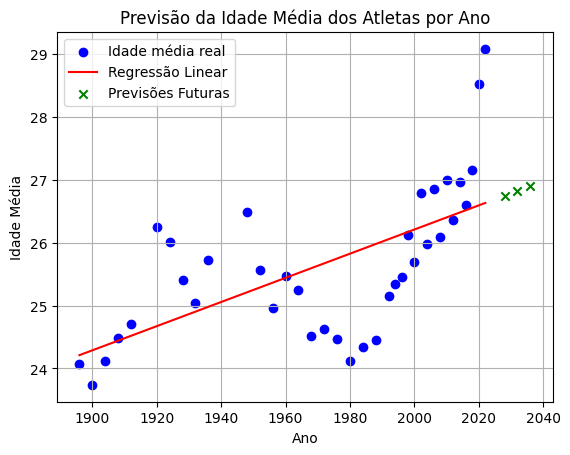

In [ ]:
x = idade_media_por_ano[['ano']] # preditor
y = idade_media_por_ano['idade'] # prever


# criar e treinar modelo de regressao
modelo_linear = LinearRegression()
modelo_linear.fit(x, y)


import numpy as np
# Prever anos futuros
anos_futuros = np.array([[2028], [2032], [2036]])
idade_prevista = modelo_linear.predict(anos_futuros)

# Mostrar previsões
for ano, idade in zip(anos_futuros.flatten(), idade_prevista):
    print(f'Ano: {ano}, Idade média prevista: {idade:.2f} anos')



plt.scatter(x, y, color='blue', label='Idade média real') # Plotar dados reais
plt.plot(x, modelo_linear.predict(x), color='red', label='Regressão Linear') # Plotar a linha da regressão
plt.scatter(anos_futuros, idade_prevista, color='green', label='Previsões Futuras', marker='x') # Plotar as previsões futuras
plt.title('Previsão da Idade Média dos Atletas por Ano')
plt.xlabel('Ano')
plt.ylabel('Idade Média')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#criando dataframe para contar medalhas
df_atletas_medalhas = df_atletas[['athlete_name', 'event', 'medal', 'country', 'edition', 'tipo_edicao']]
print(df_atletas_medalhas.head().to_string())



      athlete_name                  event medal country               edition      tipo_edicao
0      A. Sansores       Sabre, Team, Men  None    Cuba  1924 Summer Olympics  Summer Olympics
1     Álvaro Ledón  Foil, Individual, Men  None    Cuba  1924 Summer Olympics  Summer Olympics
2     Álvaro Ledón        Foil, Team, Men  None    Cuba  1924 Summer Olympics  Summer Olympics
3  Abelardo Cuevas            Music, Open  None    Cuba  1932 Summer Olympics  Summer Olympics
4     V. Fernández       Sabre, Team, Men  None    Cuba  1924 Summer Olympics  Summer Olympics


In [ ]:
from pandas_gbq import to_gbq

#salvando data frame no bigquery
to_gbq(df_atletas_limpo, destination_table='dados_jogos.dados_atletas_limpo', project_id='analise-jogos-olimpicos', if_exists='replace')

to_gbq(df_atletas_medalhas, destination_table='dados_jogos.dados_atletas_medalhas', project_id='analise-jogos-olimpicos', if_exists='replace')

to_gbq(df_jogos, destination_table='dados_jogos.dados_jogos', project_id='analise-jogos-olimpicos', if_exists='replace')



100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]
